In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [42]:
data = pd.read_csv('twitter_training.csv', names=['ID', 'Topic', 'Sentiment', 'Tweet'], header=None)

In [43]:
data.head()

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [44]:
data.tail()

,ID,Topic,Sentiment,Tweet
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [49]:
dt.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [9]:
print(data.isnull().sum())

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64


In [50]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [47]:
print(data['Sentiment'].unique())

['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [67]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
data['polarity'] = data['Sentiment'].apply(get_sentiment)


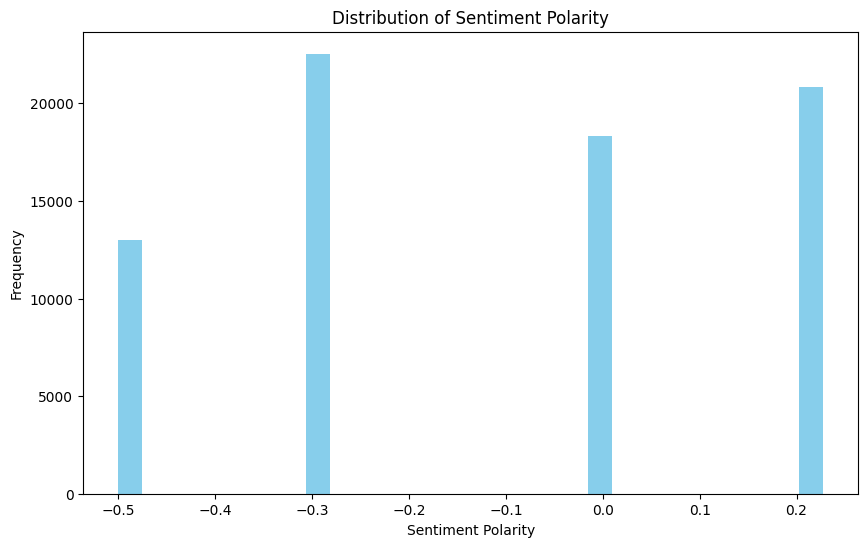

In [68]:

plt.figure(figsize=(10, 6))
plt.hist(data['polarity'], bins=30, color='skyblue')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity')
plt.show()


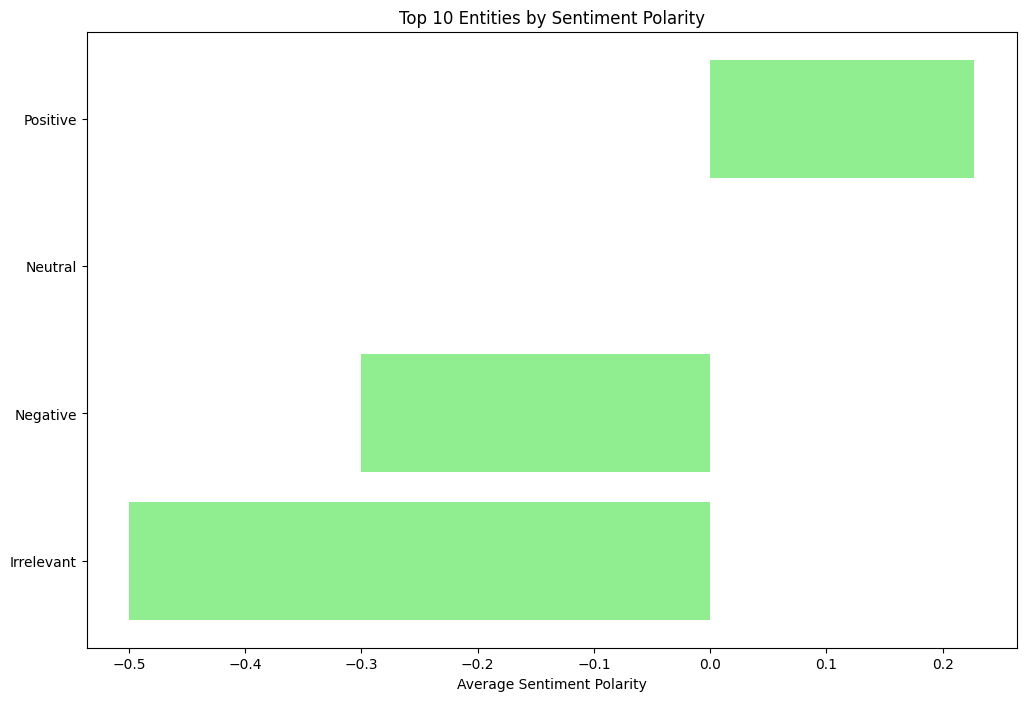

In [69]:
entity_sentiment = data.groupby('Sentiment')['polarity'].mean().reset_index()
entity_sentiment_sorted = entity_sentiment.sort_values(by='polarity', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(entity_sentiment_sorted['Sentiment'][:10], entity_sentiment_sorted['polarity'][:10], color='lightgreen')
plt.xlabel('Average Sentiment Polarity')
plt.title('Top 10 Entities by Sentiment Polarity')
plt.gca().invert_yaxis()
plt.show()


<Figure size 1500x800 with 0 Axes>

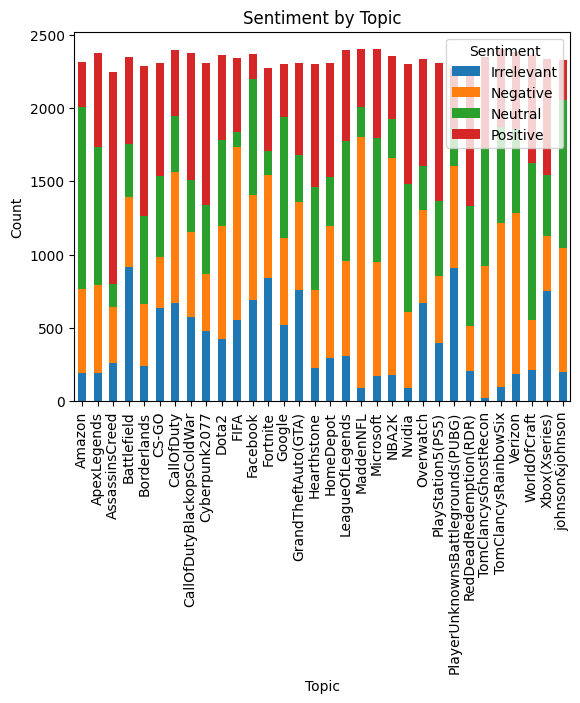

In [63]:
plt.figure(figsize=(15,8))
sentiment_by_topic = dt.groupby(['Topic', 'Sentiment']).size().unstack(fill_value=0)
sentiment_by_topic.plot(kind='bar', stacked=True)
plt.title('Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

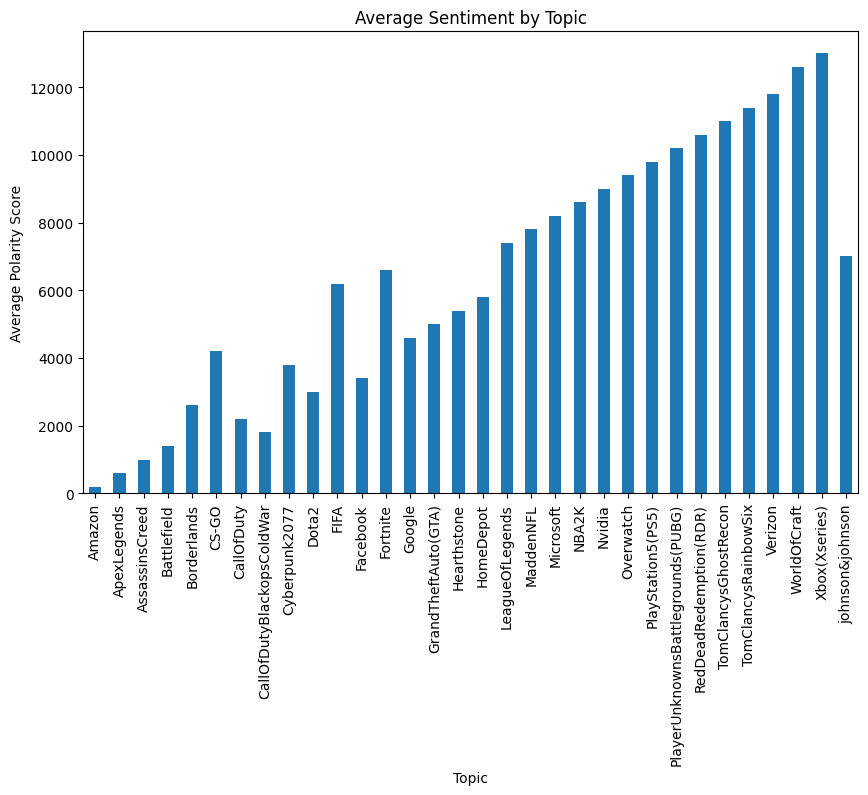

In [70]:
plt.figure(figsize=(10, 6))
average_polarity_by_topic = dt.groupby('Topic')['ID'].mean()
average_polarity_by_topic.plot(kind='bar')
plt.title('Average Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Polarity Score')
plt.show()